In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
plt.style.use('seaborn')

Using TensorFlow backend.


## Define activation function we'll use for our neural network

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(self, x):
    return np.tanh(x)

## Visualize both activation function

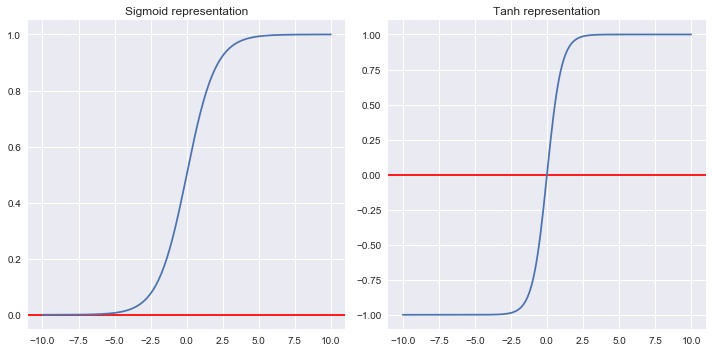

In [3]:
vect = np.linspace(-10,10,200)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Sigmoid representation")
plt.axhline(0, color='red')
plt.plot(vect, sigmoid(vect))

plt.subplot(1,2,2)
plt.title("Tanh representation")
plt.axhline(0, color='red')
plt.plot(vect, np.tanh(vect))

plt.tight_layout()

## Define basic neural network 

In [4]:
class NeuralNetwork:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        n_neurons = 15
        n_output = y.shape[1]
        self.w1 = 2 * np.random.rand(X.shape[1], n_neurons) - 1
        self.w2 = w2 = 2 * np.random.rand(n_neurons, n_output) - 1
        self.b1 = np.random.rand(1, n_neurons)
        self.b2 = np.random.rand(1, n_output)
        self.history_error = []
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def der_sigmoid(self, x):
        return sigmoid(x)*(1-sigmoid(x))
    
    def tanh(self, x):
        return np.tanh(x)
    
    def der_tanh(self,x):
        return 1 - self.tanh(x) ** 2
    
    def feedforward(self):
        
        # Dot product of input data & weigths + bias
        self.z1 = np.dot(self.X, self.w1) + self.b1
        # Pass it threw activation function
        self.a1 = sigmoid(self.z1)
        
        # Same with layer 1 as input
        self.z2 = np.dot(self.a1,self.w2) + self.b2
        self.a2 = sigmoid(self.z2)
        
        # Compute & store error
        error = (abs(self.y-self.a2)).mean()
        self.history_error.append(error)
        
    def backpropagation(self):
        
        d_w2 = 2*(self.y-self.a2) * self.der_sigmoid(self.z2) 
        d_w1 = np.dot(d_w2,self.w2.T) * self.der_sigmoid(self.z1)

        # Update weights
        self.w1 += np.dot(self.X.T, d_w1) * self.learning_rate
        self.w2 += np.dot(self.a1.T,d_w2) * self.learning_rate

        # Update bias
        for delta in d_w2:
            self.b2 += self.learning_rate * delta

        for delta in d_w1:
            self.b1 += self.learning_rate * delta
        
    def train(self,epochs,learning_rate):  
        
        self.learning_rate = learning_rate
        
        for i in range(1,epochs):
            self.feedforward()
            self.backpropagation()
        print("Final error:", self.history_error[-1])
            
    def predict(self,X_test):
        """Return a list of prediction from test data"""
        
        a1 = self.sigmoid(np.dot(X_test, self.w1))
        a2 = self.sigmoid(np.dot(a1, self.w2))
        pred = []
        
        for i in a2:
            pred.append(np.argmax(i))
        
        return pred
        
    def plot_error(self):
        plt.figure(figsize=(5,5))
        plt.title('Error over iterations')
        plt.plot(range(0,len(self.history_error)),self.history_error)
        plt.xlabel('Number of iteration')
        plt.ylabel('Error')
        

In [5]:
data_iris = load_iris()
data = data_iris.data

In [6]:
y = to_categorical(data_iris.target)
X = data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## Let's test our neural network on iris dataset

Final error: 0.10456449880266164


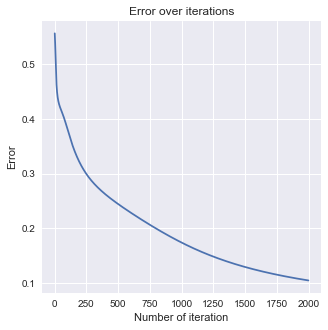

In [7]:
nnw = NeuralNetwork(X_train, y_train)
nnw.train(epochs=2000, learning_rate=0.001)
nnw.plot_error()
pred = nnw.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



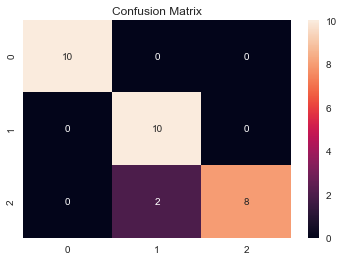

In [8]:
y_true = np.argmax(y_test,axis=1)
print(classification_report(pred, y_true))

plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(pred,y_true), annot=True)

In [9]:
class NeuralNetwork:
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        n_neurons = 40
        n_output = y.shape[1]
        self.w1 = 2 * np.random.rand(X.shape[1], n_neurons) - 1
        self.w2 = 2 * np.random.rand(n_neurons, 20) - 1
        self.w3 = 2 * np.random.rand(20, n_output) - 1
        self.b1 = np.random.rand(1, n_neurons)
        self.b2 = np.random.rand(1, 20)
        self.b3 = np.random.rand(1, n_output)

        self.history_error = []
        
    def softmax(self,s):
        exps = np.exp(s - np.max(s, axis=1, keepdims=True))
        return exps/np.sum(exps, axis=1, keepdims=True)
    
    def cross_entropy(self,pred, real):
        n_samples = real.shape[0]
        res = pred - real
        return res/n_samples

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def der_sigmoid(self,x):
        return sigmoid(x)*(1-sigmoid(x))
    
    def tanh(self, x):
        return np.tanh(x)
    
    def der_tanh(self,x):
        return 1 - self.tanh(x) ** 2
    
    def feedforward(self):
        
        # Dot product of input data & weigths + bias
        self.z1 = np.dot(self.X, self.w1) + self.b1
        # Pass it threw activation function
        self.a1 = self.tanh(self.z1)
        
        # Same with layer 1 as input
        self.z2 = np.dot(self.a1,self.w2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        self.z3 = np.dot(self.a2,self.w3) + self.b3
        self.a3 = self.sigmoid(self.z3)
        
        # Compute & store error
        # error = (abs(self.y-self.a3)).mean()
        error = np.square(self.y - self.a3).mean()
        self.history_error.append(error)
        
    def backpropagation(self):
        d_w3 = 2*(self.y-self.a3) * self.der_sigmoid(self.z3) 
        # d_w3  = self.cross_entropy(self.a3, self.y)        
        d_w2 = np.dot(d_w3,self.w3.T) * self.der_sigmoid(self.z2)
        d_w1 = np.dot(d_w2,self.w2.T) * self.der_tanh(self.z1)
    

        # Update weights
        self.w1 += np.dot(self.X.T, d_w1) * self.learning_rate
        self.w2 += np.dot(self.a1.T,d_w2) * self.learning_rate
        self.w3 += np.dot(self.a2.T,d_w3) * self.learning_rate

        # Update bias
        for delta in d_w3:
            self.b3 += self.learning_rate * delta
            
        for delta in d_w2:
            self.b2 += self.learning_rate * delta

        for delta in d_w1:
            self.b1 += self.learning_rate * delta
        
    def train(self,epochs,learning_rate):  
        
        self.learning_rate = learning_rate
        
        for i in range(1,epochs):
            self.feedforward()
            self.backpropagation()
        print("Final error:", self.history_error[-1])
            
    def predict(self,X_test):
        """Return a list of prediction from test data"""
        
        a1 = self.tanh(np.dot(X_test, self.w1))
        a2 = self.sigmoid(np.dot(a1, self.w2))
        a3 = self.sigmoid(np.dot(a2, self.w3))
        pred = []
        
        for i in a3:
            pred.append(np.argmax(i))
        
        return pred
        
    def plot_error(self):
        plt.figure(figsize=(5,5))
        plt.title('Error over iterations')
        plt.plot(range(0,len(self.history_error)), self.history_error)
        plt.xlabel('Number of iteration')
        plt.ylabel('Error')
        

Final error: 0.01527944904797521


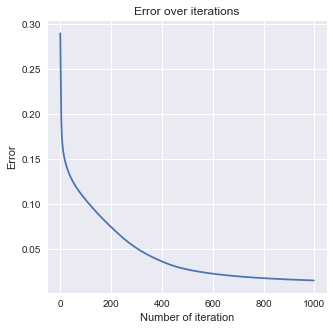

In [10]:
nnw = NeuralNetwork(X_train, y_train)
nnw.train(epochs=1000, learning_rate=0.001)
nnw.plot_error()
pred = nnw.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.42      1.00      0.59         5
           2       1.00      0.53      0.70        15

    accuracy                           0.77        30
   macro avg       0.81      0.84      0.76        30
weighted avg       0.90      0.77      0.78        30



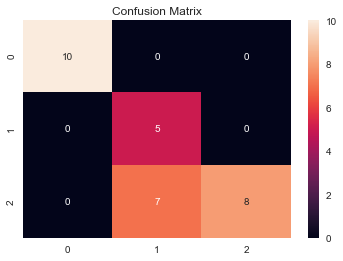

In [11]:
y_true = np.argmax(y_test,axis=1)
print(classification_report(pred, y_true))

plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(pred,y_true), annot=True)